In [182]:
import pandas as pd
import torch
import os
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

result_dir = "D:/JHMDB/models"

# all models

In [58]:
results = {}
for m in tqdm(os.listdir(f"{result_dir}")):

    # print(m)

    max_acc = 0
    max_train_acc = 0

    for e in os.listdir(f"{result_dir}/{m}"):

        if e == 'model': continue

        res = torch.load(f"{result_dir}/{m}/{e}", map_location=torch.device('cpu'))
        acc = accuracy_score(res['val_actual'], res['val_predicted'])
        train_acc = accuracy_score(res['train_actual'], res['train_predicted'])

        if acc > max_acc: max_acc = acc
        if train_acc > max_train_acc: max_train_acc = train_acc

    results[m] = max_acc

    # print(max_acc)
    # print(max_train_acc)

s = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
for k in s.keys():
    print(f"{k} - {s[k]}")

100%|██████████| 37/37 [01:26<00:00,  2.33s/it]

m_test - 0
m_5.4.3 - 0.06716417910447761
m_6.0 - 0.07462686567164178
m_5.4.4 - 0.08582089552238806
m_4.7 - 0.09328358208955224
m_5.10 - 0.1044776119402985
m_5.4.2 - 0.1044776119402985
m_5.5 - 0.11567164179104478
m_5.8 - 0.11567164179104478
m_5.6 - 0.12313432835820895
m_4.9.5 - 0.13432835820895522
m_5.7 - 0.13432835820895522
m_4.9.10 - 0.13805970149253732
m_5.3 - 0.13805970149253732
m_5.4.6 - 0.13805970149253732
m_4.9.4 - 0.1417910447761194
m_4.10 - 0.14925373134328357
m_5.9 - 0.14925373134328357
m_4.11 - 0.16044776119402984
m_4.9.8 - 0.16044776119402984
m_5.4.5 - 0.16044776119402984
m_4.9.9 - 0.16791044776119404
m_4.4 - 0.17164179104477612
m_4.8 - 0.17537313432835822
m_4.9.2 - 0.17537313432835822
m_4.9 - 0.1791044776119403
m_4.9.12 - 0.1828358208955224
m_4.9.6 - 0.1865671641791045
m_5.1 - 0.1865671641791045
m_5.4.1 - 0.19029850746268656
m_4.6 - 0.19402985074626866
m_4.9.11 - 0.19776119402985073
m_5.0 - 0.20149253731343283
m_5.4 - 0.20149253731343283
m_5.2 - 0.20522388059701493
m_4.9.7 

# one model

100%|██████████| 2000/2000 [00:11<00:00, 177.74it/s]

1771


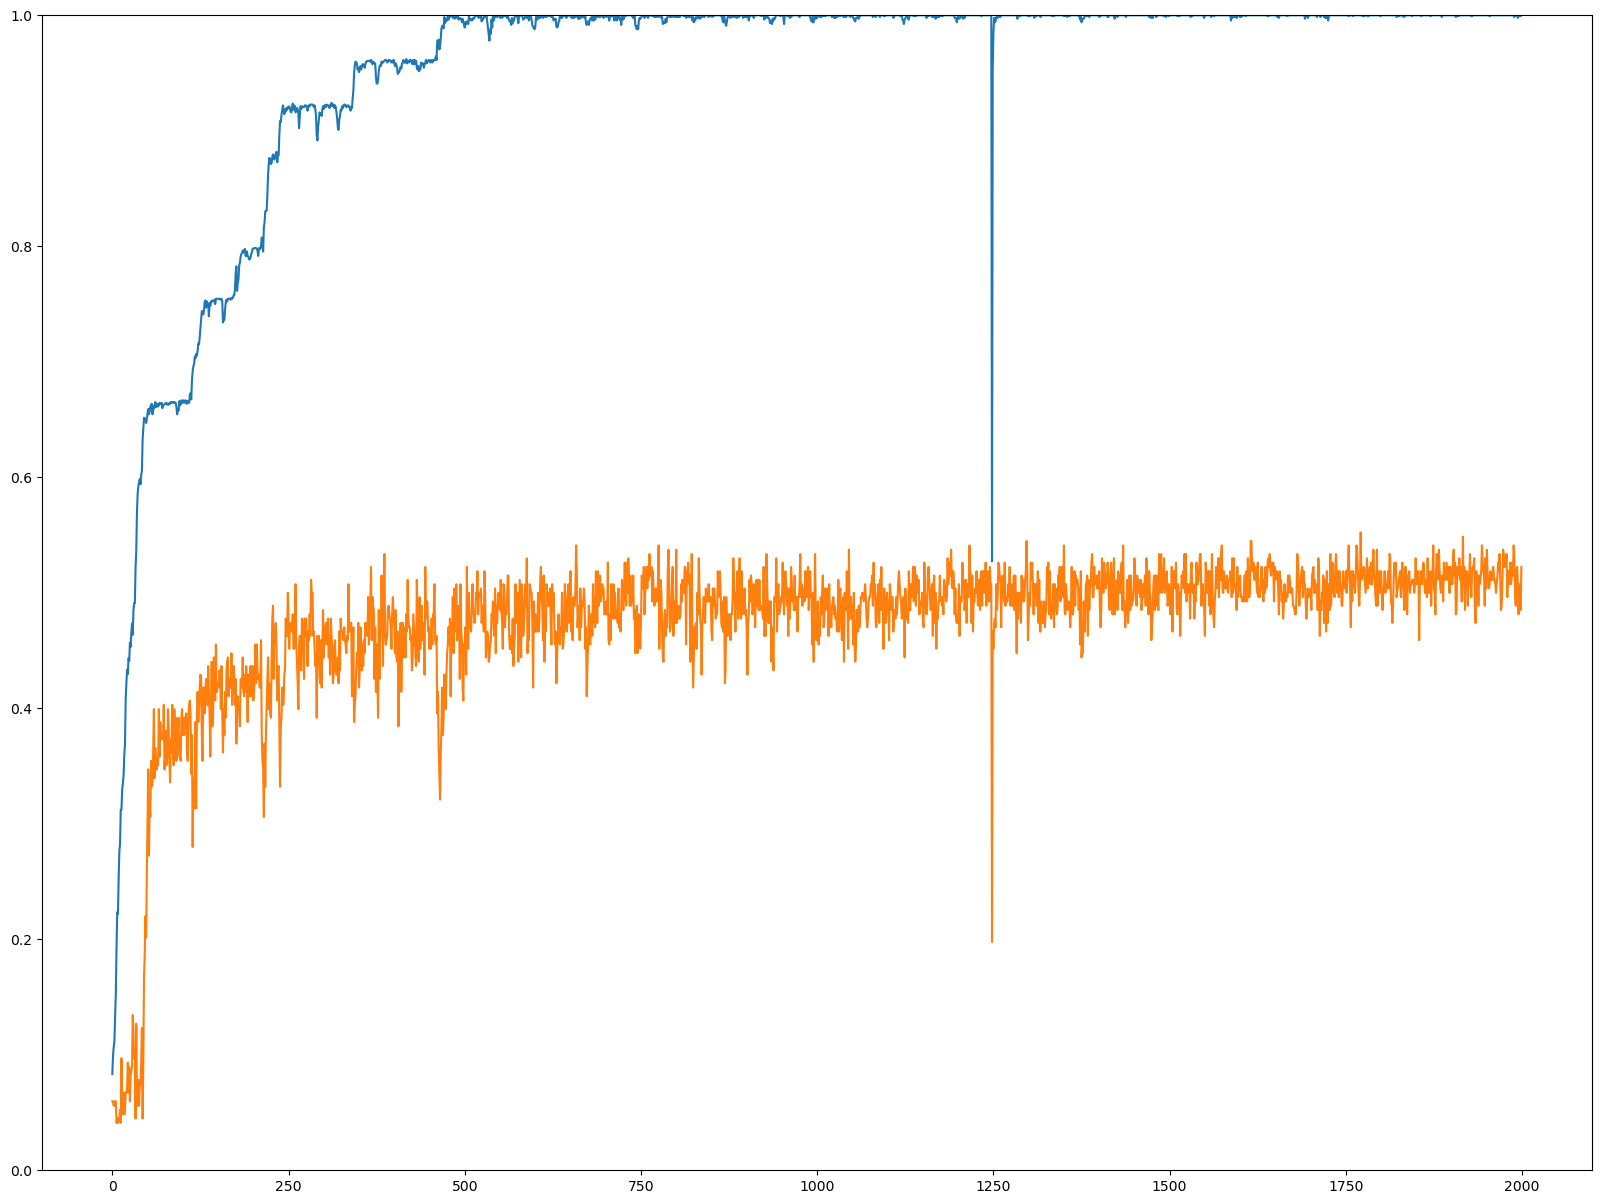

In [185]:
#Change this to the version you want
VERSION = "10.7.25_new"

model_path = f"{result_dir}/m_{VERSION}"

training_accs = []
testing_accs = []

max_epoch = None

max_testing_acc = 0

model_files = os.listdir(model_path)
new_model_files = []
for mf in model_files:
    if mf == 'model': continue
    new_model_files.append(int(mf))

new_model_files.sort()
# print(new_model_files)
model_files = new_model_files

for e in tqdm(model_files):

    if e == 'model' : continue

    res = torch.load(f"{model_path}/{e}", map_location=torch.device('cpu'))

    training_accs.append(accuracy_score(res['train_actual'], res['train_predicted']))
    testing_accs.append(accuracy_score(res['val_actual'], res['val_predicted']))

    if accuracy_score(res['val_actual'], res['val_predicted']) > max_testing_acc:
        max_conf_matrix = confusion_matrix(res['val_actual'], res['val_predicted'])
        max_epoch = e
        max_testing_acc = accuracy_score(res['val_actual'], res['val_predicted'])

print(max_epoch)

plt.figure(figsize=(20,15))
plt.ylim(0,1)
# plt.xlim(0,400)
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

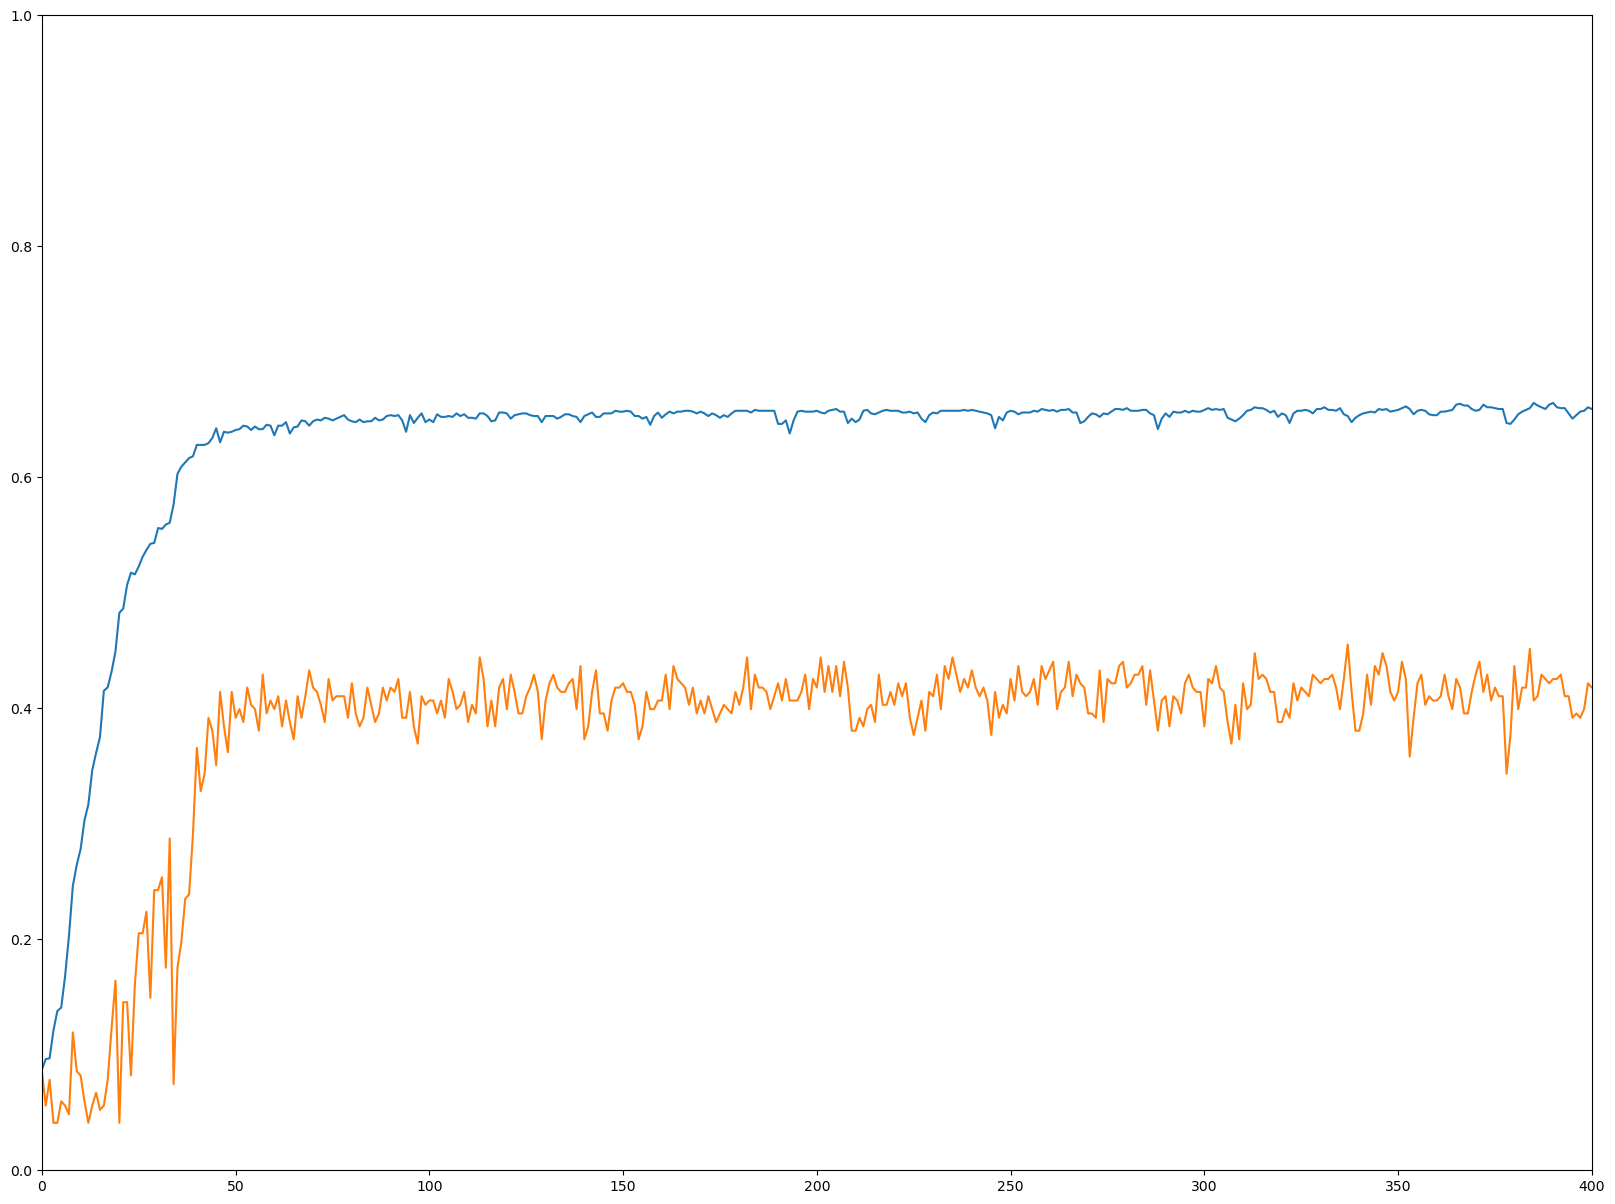

In [6]:
plt.figure(figsize=(20,15))
plt.ylim(0,1)
plt.xlim(0,400)
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

In [3]:
sum(testing_accs)/len(testing_accs)

0.4105972210769365

In [4]:
max(testing_accs)

0.4664179104477612

In [13]:
max_conf_matrix.tolist()

[[6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
 [0, 11, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0],
 [0, 1, 0, 11, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 13, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 2, 0, 0, 0, 8, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 4, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [2, 1, 0, 0, 2, 0, 0, 0, 1, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 2, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 4, 0, 1, 0, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 3, 0, 4, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0,

In [23]:
for i in range(len(max_conf_matrix)):
    # print(i)
    print(str(i) + ":" + str(max_conf_matrix[i][i] / sum(max_conf_matrix[i])))
    # break

0:0.5
1:0.8461538461538461
2:0.0
3:0.6875
4:1.0
5:0.8666666666666667
6:0.0
7:0.7272727272727273
8:0.9375
9:0.6666666666666666
10:0.0
11:0.0
12:0.8181818181818182
13:0.0
14:0.0
15:1.0
16:0.0
17:0.0
18:0.5454545454545454
19:0.6666666666666666
20:0.0


# only one

In [219]:
models = {
    "1":"D:/JHMDB/models/m_split_s1_higher_decay/",
    "2":"D:/JHMDB/models/m_split_s2_higher_decay/",
    "3":"D:/JHMDB/models/m_split_s3_higher_decay/",
}

In [197]:
classes = ['walk', 'clap', 'climb_stairs', 'shoot_gun', 'pour', 'swing_baseball', 'stand', 'shoot_ball', 'pullup', 'shoot_bow', 'wave', 'sit', 'throw', 'catch', 'pick', 'golf', 'brush_hair', 'jump', 'run', 'push', 'kick_ball']

In [220]:
results = {}

for split in models.keys():

    max_testing_acc = 0
    max_file = ""

    for i in tqdm(glob.glob(f"{models[split]}/*")):

        if i.split("\\")[-1] == "model": continue

        res = torch.load(i, map_location=torch.device('cpu'))

        if accuracy_score(res['val_actual'], res['val_predicted']) > max_testing_acc:
            max_file = i
            max_conf_matrix = confusion_matrix(res['val_actual'], res['val_predicted'])
            max_testing_acc = accuracy_score(res['val_actual'], res['val_predicted'])

    results[split] = {
        "maxfile": i,
        "confmatrix": max_conf_matrix,
        "testingacc": max_testing_acc
    }

100%|██████████| 2001/2001 [00:27<00:00, 73.43it/s]


In [221]:
for i in [1,2,3]:
    print(results[str(i)]['testingacc'])

0.4626865671641791
0.4888888888888889
0.4981132075471698


In [ ]:
class_acc_df = []

for i in range(len(classes)):
    c = classes[i]

    for split in results.keys():

        split_results = results[split]['confmatrix'][i]
        split_predictions = results[split]['confmatrix'][:,i]

        # print(i)
        # print(split_predictions)

        recall = split_results[i] / split_results.sum()
        precision = split_predictions[i] / split_predictions.sum()
        f1 = 2 * ((precision * recall) / (precision + recall))

        class_acc_df.append({
            "Class":c,
            "Split":split,
            "Recall":recall,
            "Precision":precision,
            "F1":f1
        })

class_acc_df = pd.DataFrame(class_acc_df).sort_values("Class").fillna(0)
class_acc_df['diff'] = class_acc_df['Precision'] - class_acc_df['Recall']
# class_acc_df = class_acc_df.melt(id_vars=['Class', 'Split'], value_vars=['Recall', 'Precision', 'F1'])
class_acc_df

,Class,Split,Recall,Precision,F1,diff
50,brush_hair,3,0.416667,0.714286,0.526316,0.297619
48,brush_hair,1,0.833333,0.625000,0.714286,-0.208333
49,brush_hair,2,0.416667,0.555556,0.476190,0.138889
40,catch,2,0.071429,0.250000,0.111111,0.178571
41,catch,3,0.400000,0.461538,0.428571,0.061538
...,...,...,...,...,...,...
2,walk,3,0.416667,0.500000,0.454545,0.083333
1,walk,2,0.583333,0.466667,0.518519,-0.116667
30,wave,1,0.416667,0.833333,0.555556,0.416667
32,wave,3,0.500000,0.600000,0.545455,0.100000


In [208]:
class_acc_df['F1'].mean()

0.5431380395236759

In [190]:
classes.index("climb_stairs")

2

In [181]:
test = []
for s in ['1', '2', '3']:
    split = {"split":s}
    for i in range(len(classes)):
        split[classes[i]] = results[s]['confmatrix'].tolist()[2][i]
    test.append(split)

pd.DataFrame(test).to_csv("test.csv")

In [206]:
new_class_acc_df = class_acc_df.groupby(by='Class', as_index=False).mean()
# print(new_class_acc_df[['Class', 'Recall', 'Precision']].to_latex(index=False))
new_class_acc_df

C:\Users\Nick\AppData\Local\Temp\ipykernel_21076\183945332.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_class_acc_df = class_acc_df.groupby(by='Class', as_index=False).mean()


,Class,Recall,Precision,F1,diff
0,brush_hair,0.444444,0.537037,0.465608,0.092593
1,catch,0.346032,0.405093,0.369044,0.059061
2,clap,0.589744,0.722222,0.640141,0.132479
3,climb_stairs,0.361111,0.264069,0.284363,-0.097042
4,golf,0.888889,0.848214,0.855311,-0.040675
5,jump,0.201852,0.461905,0.264286,0.260053
6,kick_ball,0.421212,0.620370,0.500000,0.199158
7,pick,0.444444,0.456876,0.449855,0.012432
8,pour,0.812500,0.499204,0.613686,-0.313296
9,pullup,0.854167,0.801535,0.825595,-0.052632


<Axes: xlabel='Class', ylabel='Precision'>

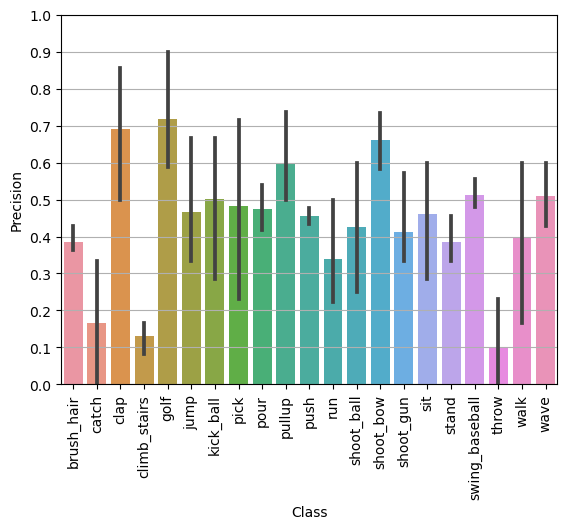

In [200]:
plt.figure()
plt.grid()
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.ylim(0,1)
sns.barplot(data=class_acc_df, x='Class', y='Precision')

<Axes: xlabel='Class', ylabel='Recall'>

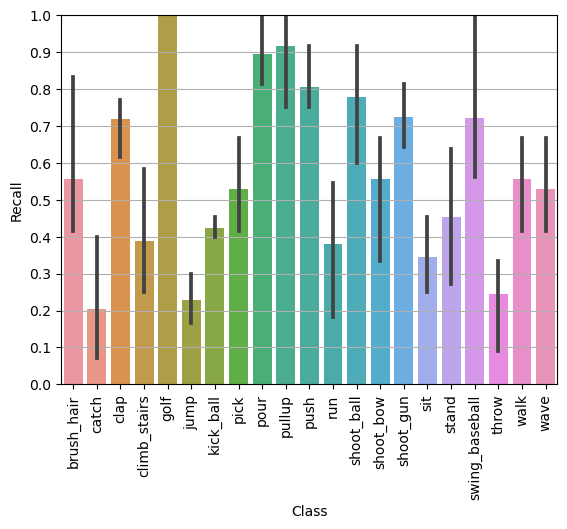

In [192]:
plt.figure()
plt.grid()
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.ylim(0,1.001)
sns.barplot(data=class_acc_df, x='Class', y='Recall')

<Axes: xlabel='Class', ylabel='F1'>

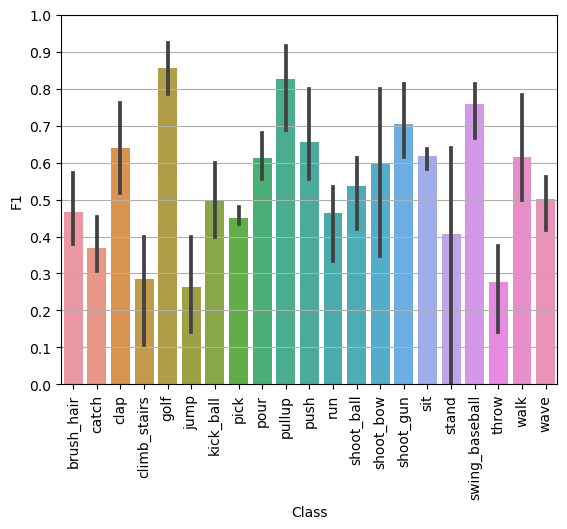

In [205]:
plt.figure()
plt.grid()
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.xticks(rotation=90)
plt.ylim(0,1)
sns.barplot(data=class_acc_df, x='Class', y='F1')

<Axes: xlabel='Class', ylabel='diff'>

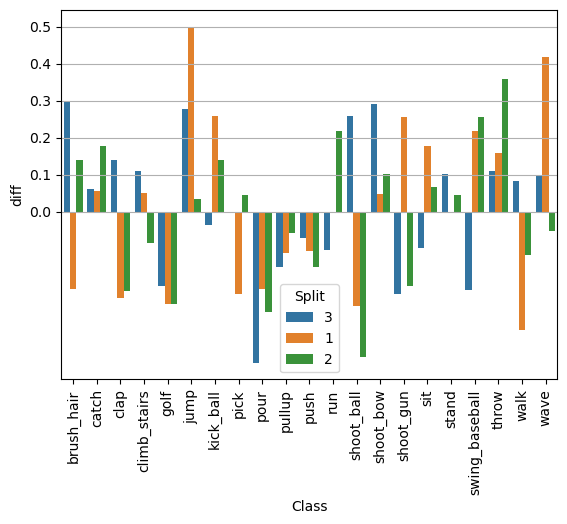

In [194]:
plt.figure()
plt.grid()
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.xticks(rotation=90)
# plt.ylim(0,1)
sns.barplot(data=class_acc_df, x='Class', y='diff', hue='Split')